---

# Importing Libraries

In [1]:
# Basic packages
from scipy.stats import chi2_contingency
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as spy
from scipy import stats
import math
%matplotlib inline

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

# Data ingestion 

In [3]:
# Load dataset
data = pd.read_csv('CardioEqptSales.csv')

---

**Convert Pandas Objects to Category type**

In [4]:
# Convert variables with "object" type to "category" type
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = data[i].astype("category") 

# Confirm if there no variables with "object" type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


---

# Feature Engineering

The Age and Education variables can be categorized to improve data analysis

**Categorizing Age**

In [5]:
# Define the age bins and labels
age_bins = [18, 24, 34, 44, 50]  # Define your age range boundaries
age_labels = ['YoungAdults', 'EarlyAdults', 'Adults', 'SeniorAdults']

# Create a new column with age categories
data['AgeGroup'] = pd.cut(
    data['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

**Categorizing Education**

In [6]:
# Define the Education bins and labels
education_bins = [12, 13, 15, 17, float("inf")]  # Define your education years range boundaries
education_labels = ['HighSchool', 'AssocDegree', 'Undergraduate', 'Graduate']

# Create a new column with Education categories
data['EducationLevel'] = pd.cut(
    data['Education'], bins=education_bins, labels=education_labels, include_lowest=True)

---

---

# Business Questions

<a id="Question1"></a>
## How do customer demographics (age, gender, education, marital status) compare across purchasers of the 3 treadmill models?

**Treadmill model vs Customer Age**

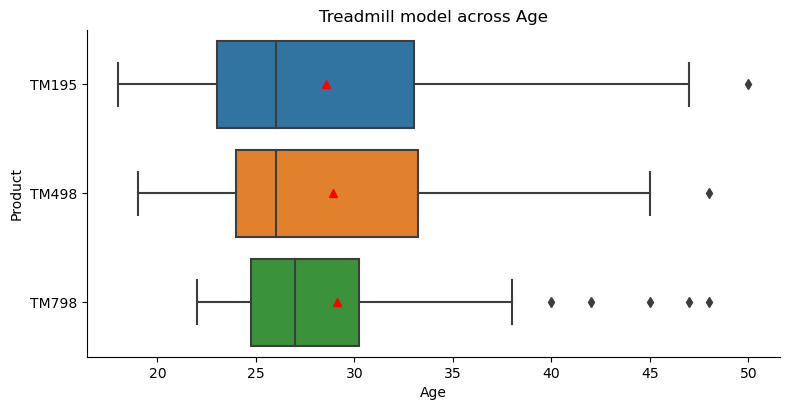

In [7]:
# Plot of Treadmill model against customer age

sns.catplot(x='Age',
            y='Product',
            kind="box",
            data=data,
            showmeans=True, 
            meanprops={"markerfacecolor": "red", "markeredgecolor": "red"},
            height=4,
            aspect=2,
            orient='h')
plt.title("Treadmill model across Age")
plt.show()

**Treadmill model vs Customer Age Group**

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:blue;">Continuous Variable Exploration

**Product by Age**

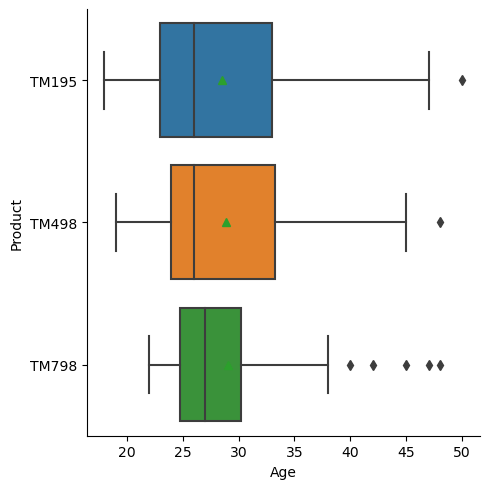

In [8]:
sns.catplot(x="Age", y="Product", kind="box", data=data, showmeans=True)
plt.show();

**Observations**
* The Age range distribution of all customers are heavily right skewed.
* The `TM195` Customers Age range was greater than both the `TM498` and `TM798`. This indicated the `TM195` is popular choice.
* The `TM798` customers had the smallest Age range with the most outliers. This indicates most of the customers are young adults.

**Product by Age with Gender split**

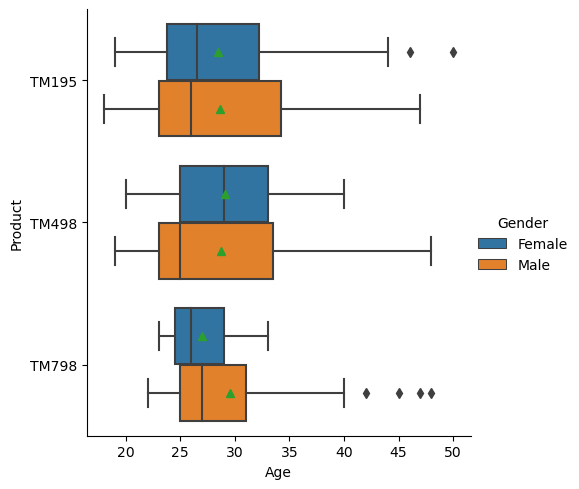

In [9]:
sns.catplot(x="Age", y="Product", kind="box", data=data, showmeans=True, hue="Gender")
plt.show();

**Observations**
* The distribution of Female customers who purchased the `TM498` resembles a normal distribution
* Male customers who purchased `TM798` spanned a wider age range than the Female customers.
* The Age ranges of the Female customers across each model were less than the Males.

**Product by Age with Marital Status split**

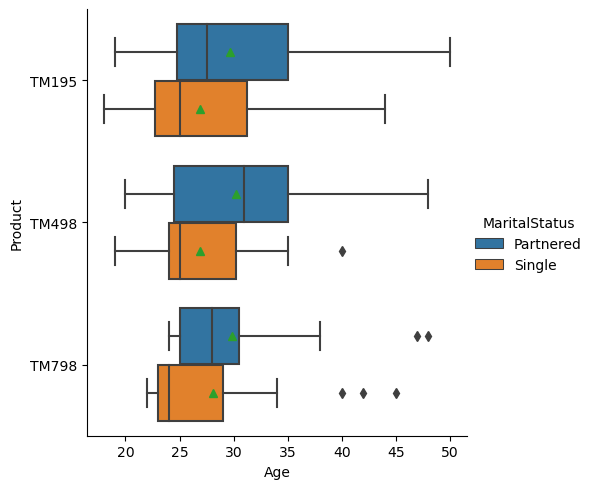

In [10]:
sns.catplot(x="Age", y="Product", kind="box", data=data, showmeans=True, hue="MaritalStatus")
plt.show();

**Observations**
* The mean Age of Partnered customers were greater than the Single customers across each model
* The Partnered customers accounted for older customers across each model.

**Product by Income**

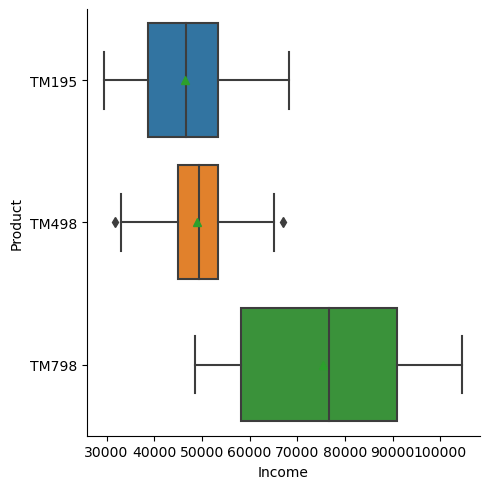

In [11]:
sns.catplot(x="Income", y="Product", kind="box", data=data, showmeans=True)
plt.show();

**Observations**
* The TM798 customers the highest income earners

**Product by Income with Gender split**

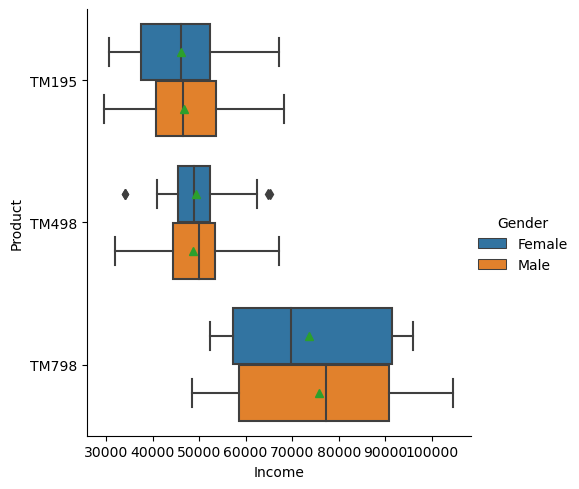

In [12]:
sns.catplot(x="Income", y="Product", kind="box", data=data, showmeans=True, hue="Gender")
plt.show();

**Observations**
* Male customers who bought the TM798 model earned more and a wider range of income compared to the Female customers.

**Product by Income with Marital Status split**

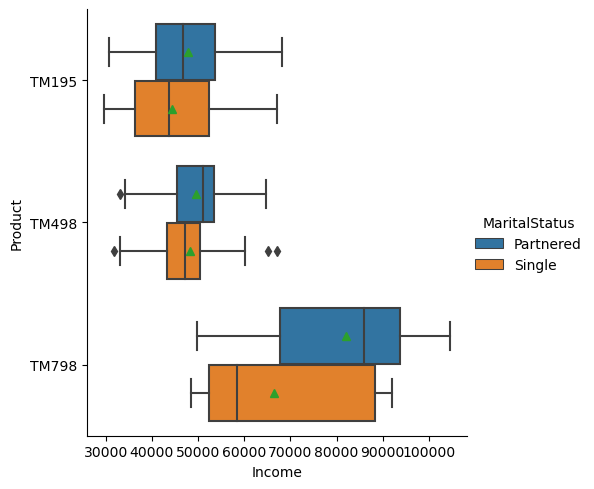

In [13]:
sns.catplot(x="Income", y="Product", kind="box", data=data, showmeans=True, hue="MaritalStatus")
plt.show();

**Observations**
* Partnered Customers earned higher average income compared to the Single customers.

**Product by Miles**

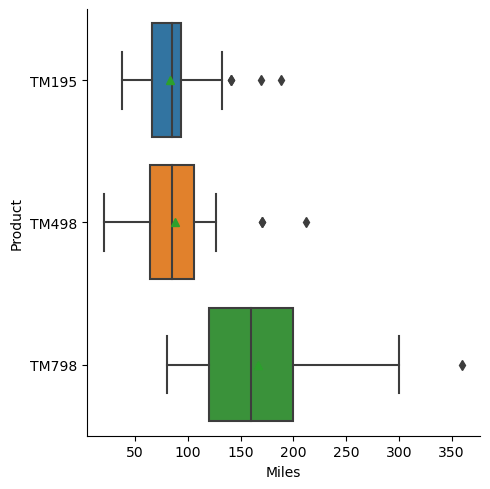

In [14]:
sns.catplot(x="Miles", y="Product", kind="box", data=data, showmeans=True)
plt.show();

**Observations**
* Customers who purchased the `TM798` model expected to run more miles and in some cases up to twice the amount of miles.

**Product by Miles with Gender split**

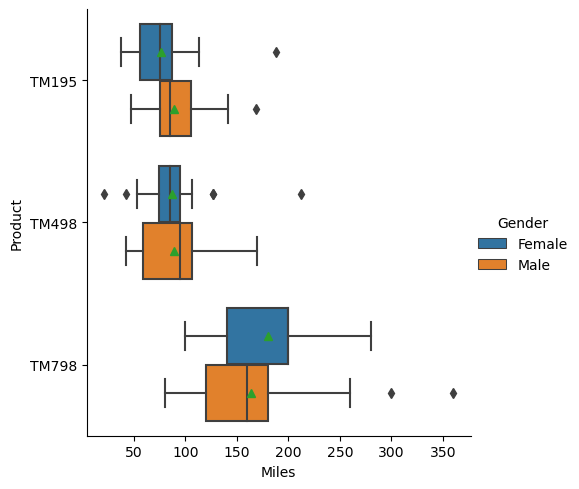

In [15]:
sns.catplot(x="Miles", y="Product", kind="box", data=data, showmeans=True, hue="Gender")
plt.show();

**Observations**
* Female customers who bought the `TM798` model expect to run a higher average number of miles than the Male customers.

**Product by Miles with Marital Status split**

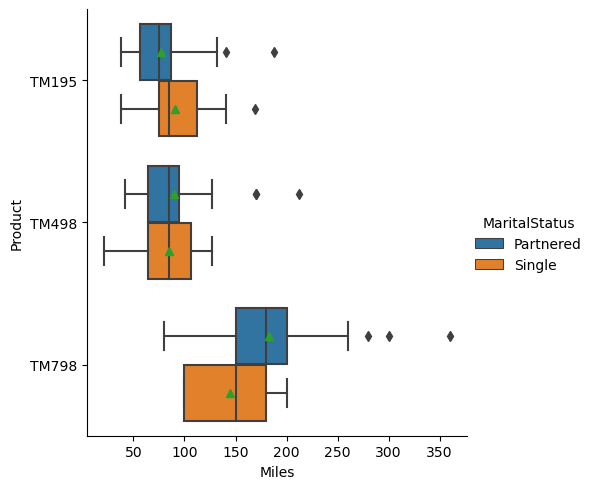

In [16]:
sns.catplot(x="Miles", y="Product", kind="box", data=data, showmeans=True, hue="MaritalStatus")
plt.show();

**Observations**
* Customers who bought the TM798 model and living in a Partnered relationship expect to up to maximum of 250 miles per week.

---

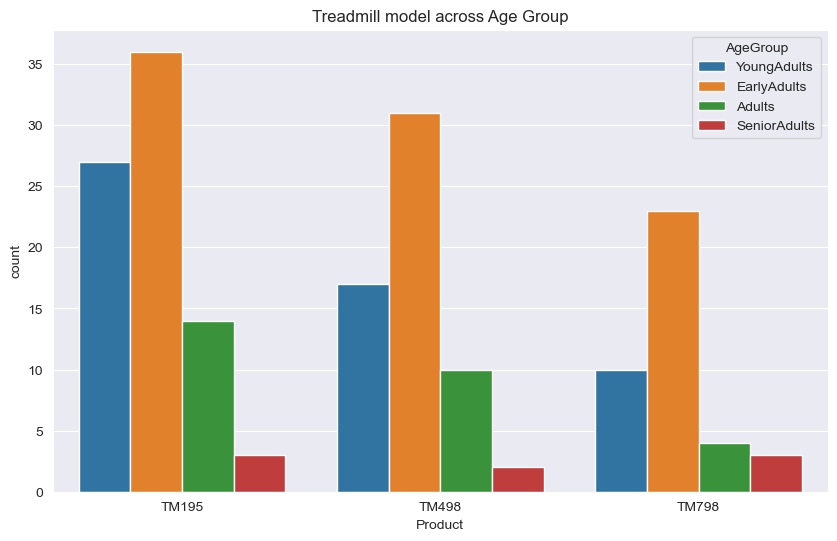

In [17]:
# Plot of treadmill model count against Age Group
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="Product", data=data, hue="AgeGroup")
plt.title("Treadmill model across Age Group")
plt.show()

**One way ANOVA for statistical significance of Customer Age across models**

In [18]:
# Group your data by 'Product' and select the 'Usage' column
grouped_age_data = [group['Age']
                    for name, group in data.groupby('Product')]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_age_data)

# Display the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean age of customers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean age of customers.")

F-statistic: 0.09421786067805005
P-value: 0.9101300808730235
Fail to reject the null hypothesis. There is no significant difference in mean age of customers.


---

**Treadmill model across Gender**

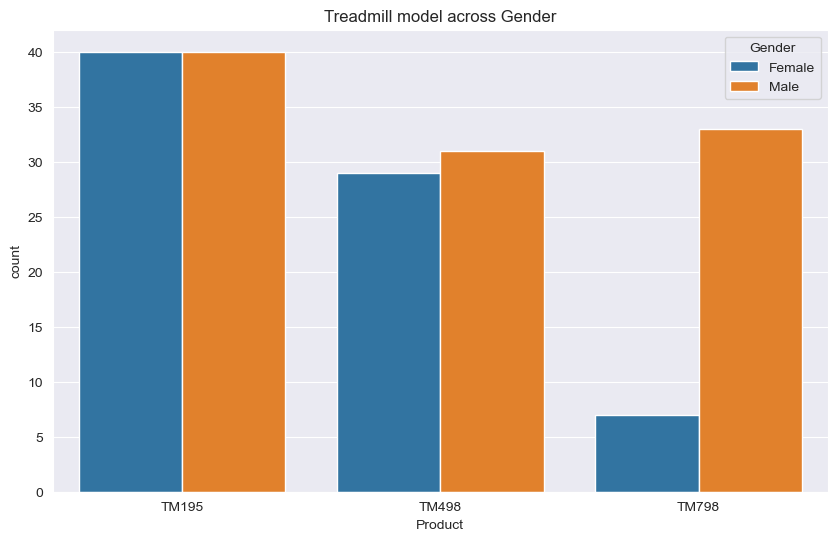

In [19]:
# Plot of treadmill model count against gender
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="Product", data=data, hue="Gender")
plt.title("Treadmill model across Gender")
plt.show()

In [20]:
# Group your data by 'Product' and 'Gender' and count occurrences
grouped_gender_data = pd.crosstab(data['Product'], data['Gender'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(grouped_gender_data)

# Display the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # Set your significance level
if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Product and Gender.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Product and Gender.")

Chi-squared statistic: 12.923836032388664
P-value: 0.0015617972833158714
Reject the null hypothesis. There is a significant relationship between Product and Gender.


---

**Treadmill model vs Customer Education**

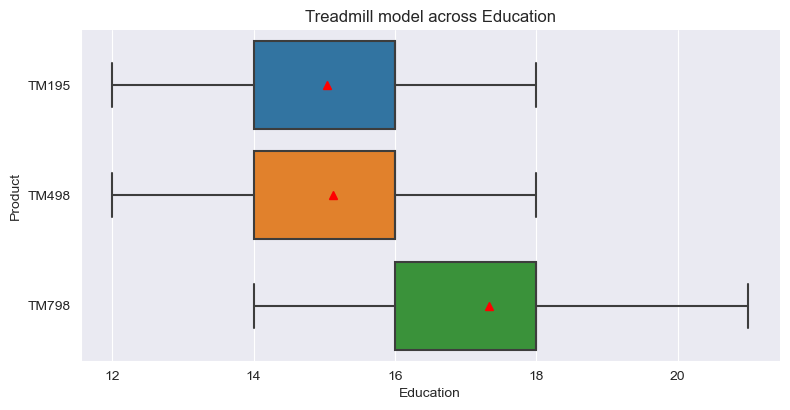

In [21]:
# Plot of Treadmill model against customer education

sns.catplot(x='Education',
            y='Product',
            kind="box",
            data=data,
            showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "red"},
            height=4,
            aspect=2,
            orient='h')
plt.title("Treadmill model across Education")
plt.show()

**Treadmill model vs Customer Education Level**

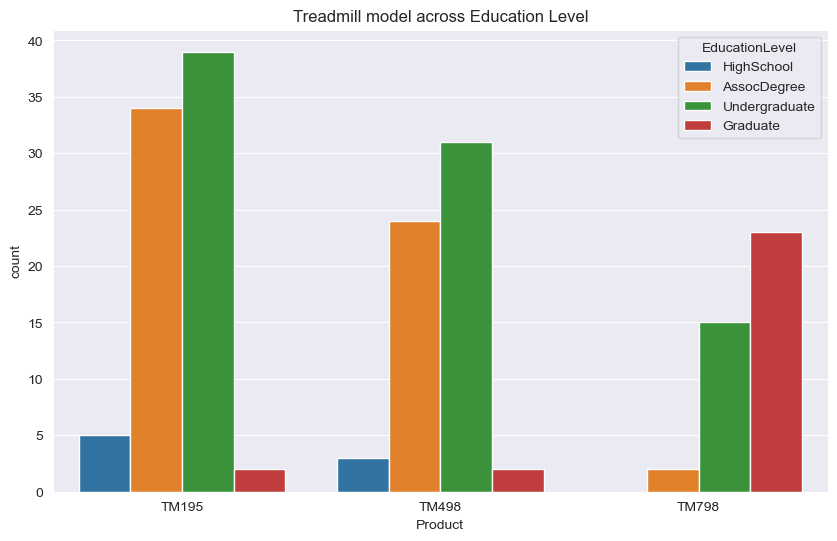

In [22]:
# Plot of treadmill model count against Education Level
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="Product", data=data, hue="EducationLevel")
plt.title("Treadmill model across Education Level")
plt.show()

In [23]:
# Group your data by 'Product' and 'Education' and count occurrences
grouped_education_data = pd.crosstab(data['Product'], data['Education'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(grouped_education_data)

# Display the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # Set your significance level
if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Product and Education.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Product and Education.")

Chi-squared statistic: 79.8846547314578
P-value: 2.9724307024156666e-11
Reject the null hypothesis. There is a significant relationship between Product and Education.


---

**Treadmill model vs Customer Marital Status**

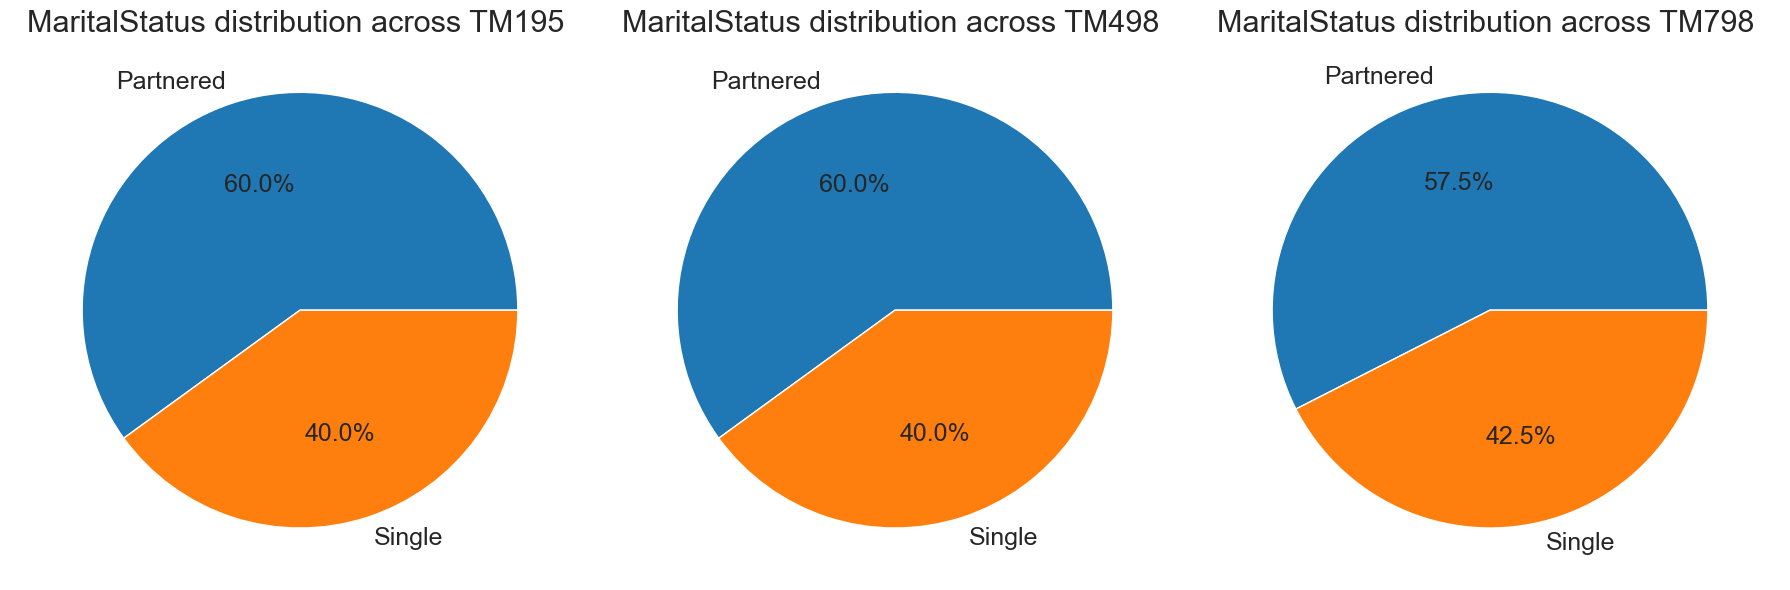

In [24]:
# Group your data by 'Product' and 'MaritalStatus' and count occurrences
grouped_marital_data = data.groupby(
    by=['Product', 'MaritalStatus']).size().unstack(fill_value=0)

# Determine the number of rows and columns for your subplot grid
num_rows = 1  # You can change this as needed
num_cols = len(grouped_marital_data.index)

# Create a figure and subplot grid
# Adjust the figure size as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6))

# Increase the font sizes
title_fontsize = 22
label_fontsize = 18

# Create a pie chart for each 'Product' group and place them side by side
for i, (product, counts) in enumerate(grouped_marital_data.iterrows()):
    ax = axes[i]
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%',
           textprops={'fontsize': label_fontsize})
    ax.set_title(
        f'MaritalStatus distribution across {product} ', fontsize=title_fontsize)
    ax.axis('equal')  # Equal aspect ratio ensures that the pie is circular

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

plt.show()

In [25]:
# Group your data by 'Product' and 'MaritalStatus' and count occurrences
grouped_marital_data = pd.crosstab(data['Product'], data['MaritalStatus'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(grouped_marital_data)

# Display the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # Set your significance level
if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Product and MaritalStatus.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Product and MaritalStatus.")

Chi-squared statistic: 0.0806554858532839
P-value: 0.9604745988058153
Fail to reject the null hypothesis. There is no significant relationship between Product and MaritalStatus.


---

**Observations:**

CardioGood should take an inclusive approach in marketing that avoids targeting narrow age ranges or lifestyles. Messaging and imagery for all models should appeal to a wide cross-section of adults across generations and relationship statuses. However, the data indicates opportunities to fine-tune brand positioning and partnerships by model based on core customer segments.

The TM195 treadmill should be promoted toward younger millennial fitness enthusiasts entering the category, highlighting introductory pricing and features. For the premium TM798 model, marketing should focus on performance-driven male runners based on their significant representation in this segment. Tactics like in-gym promotions and running event sponsorships can effectively reach this group. Additionally, TM798 messaging should highlight productivity features and advanced training data to align with educated professionals drawn to this top-tier model. In summary, while taking an inclusive approach, targeted outreach to align with the core demographics of each customer segment can help strengthen treadmill model positioning and marketing effectiveness.

<a href="#Objectives">Go to Objectives</a>

---

<a id="Question2"></a>
## Is there a relationship between customer income level and the treadmill model purchased?

**Treadmill model vs Customer Income**

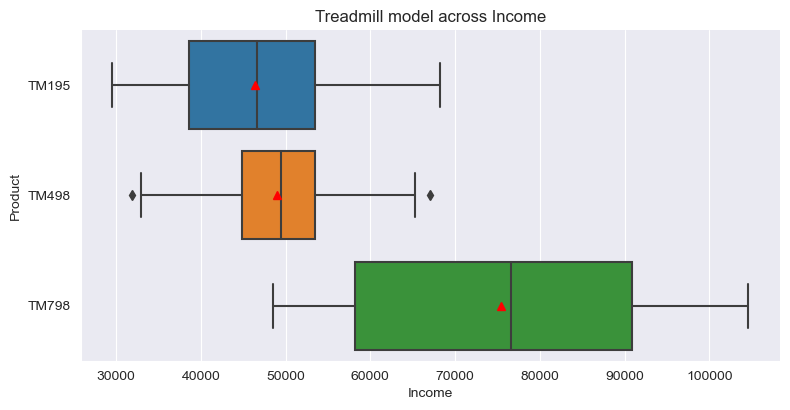

In [26]:
# Plot of Treadmill model against customer income

sns.catplot(x='Income',
            y='Product',
            kind="box",
            data=data,
            showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "red"},
            height=4,
            aspect=2,
            orient='h')
plt.title("Treadmill model across Income")
plt.show()

**Mean Income across Treadmill models**

In [27]:
# Mean of Income across Treadmill models
data.groupby(by='Product').Income.mean()

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

**One way ANOVA for statistical significance of Customer Income across models**

In [28]:
# Group your data by 'Product' and select the 'Usage' column
grouped_income_data = [group['Income']
                       for name, group in data.groupby('Product')]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_income_data)

# Display the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean customer income.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean customer income.")

F-statistic: 89.25903546601671
P-value: 1.5644991316342494e-27
Reject the null hypothesis. There is a significant difference in mean customer income.


**Observations:**

This analysis found income level strongly correlates with treadmill model selection. Specifically, the data showed customers with higher incomes overwhelmingly prefer the premium TM798 model.

To leverage this, CardioGood should make income a key factor in shaping TM798 marketing strategy and targeting. Messaging and partnerships should focus on highlighting the superior quality, performance, and prestige of the TM798. This positions it as an aspirational product for high-income earners. Tactics like digital ads geo-targeted by income levels can help reach affluent professionals identified as top prospects. Additionally, brand sponsorships of luxury events popular with wealthy consumers can further strengthen TM798's premium branding. In summary, showcasing the TM798 as a top-of-the-line model will resonate with high income customers and drive growth in this profitable segment.

<a href="#Objectives">Go to Objectives</a>

---

<a id="Question3"></a>
## Do trends emerge in the expected usage frequencies and weekly mileage across the 3 product models?

**Usage distribution across treadmill models**

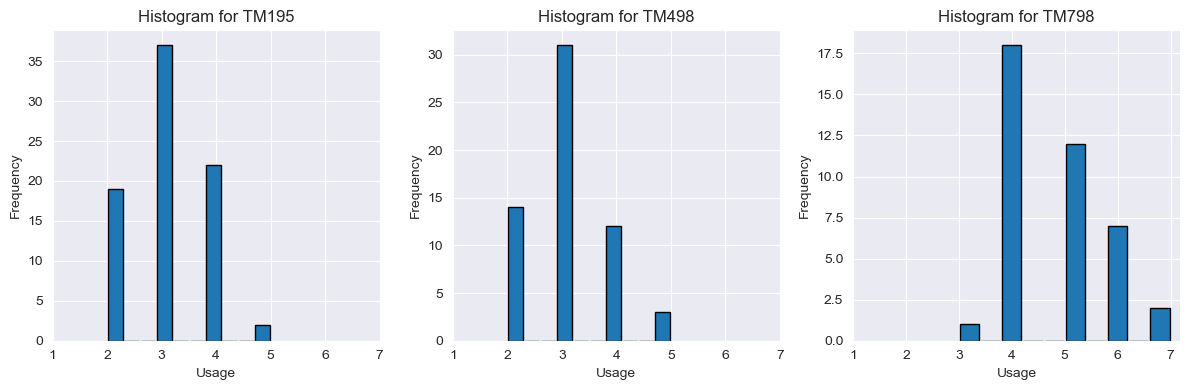

In [29]:
# Create a list of unique products in your data
Tmodels = data['Product'].unique()

# Determine the number of rows and columns for your subplot grid
num_rows = 1
num_cols = len(Tmodels)

# Create a figure and subplot grid
# Adjust the figure size as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))

# Create a separate plot for each product
for i, product in enumerate(Tmodels):
    data[data['Product'] == product]['Usage'].hist(
        ax=axes[i], bins=10, rwidth=0.9, edgecolor='k')
    axes[i].set_title(f'Histogram for {product}')
    axes[i].set_xlabel('Usage')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks(range(1, 8, 1))  # Set integer values as x-axis ticks

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

plt.show()

**Summary statistics of Usage**

In [30]:
data.groupby(by='Product')['Usage'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
TM195,80.0,3.087500,0.782624,2.0,3.0,3.0,4.00,5.0
TM498,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
TM798,40.0,4.775000,0.946993,3.0,4.0,5.0,5.00,7.0


**One way ANOVA for statistical significance of Customer Usage across models**

In [31]:
# Group your data by 'Product' and select the 'Usage' column
grouped_usage_data = [group['Usage'] for name, group in data.groupby('Product')]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_usage_data)

# Display the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean usage frequency.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean usage frequency.")

F-statistic: 65.44446547156178
P-value: 5.281513288947641e-22
Reject the null hypothesis. There is a significant difference in mean usage frequency.


---

**Miles distribution across treadmill models**

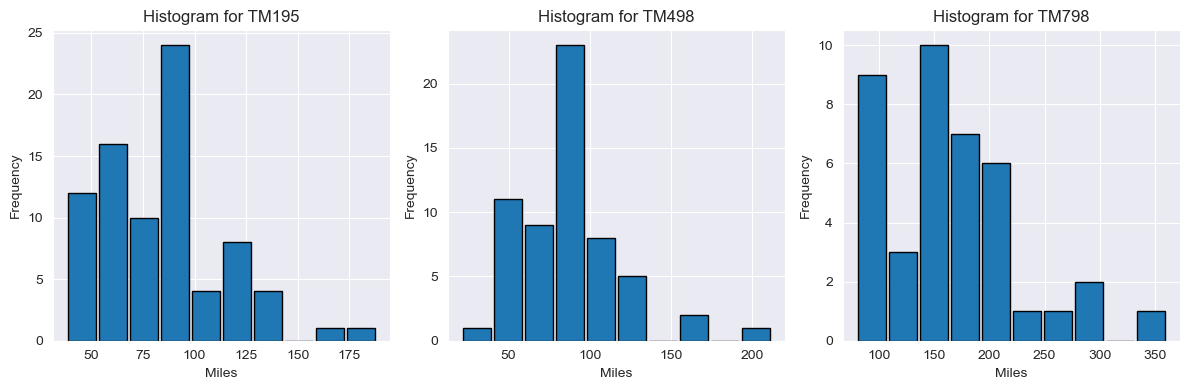

In [32]:
# Create a list of unique products in your data
Tmodels = data['Product'].unique()

# Determine the number of rows and columns for your subplot grid
num_rows = 1
num_cols = len(Tmodels)

# Create a figure and subplot grid
# Adjust the figure size as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))

# Create a separate plot for each product
for i, product in enumerate(Tmodels):
    data[data['Product'] == product]['Miles'].hist(
        ax=axes[i], bins=10, rwidth=0.9, edgecolor='k')
    axes[i].set_title(f'Histogram for {product}')
    axes[i].set_xlabel('Miles')
    axes[i].set_ylabel('Frequency')

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

plt.show()

**Summary statistics of Miles**

In [33]:
data.groupby(by='Product')['Miles'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
TM195,80.0,82.787500,28.874102,38.0,66.0,85.0,94.0,188.0
TM498,60.0,87.933333,33.263135,21.0,64.0,85.0,106.0,212.0
TM798,40.0,166.900000,60.066544,80.0,120.0,160.0,200.0,360.0


**One way ANOVA for statistical significance of Customer Miles across models**

In [34]:
# Group your data by 'Product' and select the 'Usage' column
grouped_miles_data = [group['Miles'] for name, group in data.groupby('Product')]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_miles_data)

# Display the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean miles frequency.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean miles frequency.")

F-statistic: 68.24179605090241
P-value: 1.0730574762130848e-22
Reject the null hypothesis. There is a significant difference in mean miles frequency.


---

**Observations:**

This analysis uncovered distinct usage profiles associated with each treadmill model. For the entry-level TM195, the majority of customers expected to use the treadmill sparingly, with average weekly usage of just 2-3 times. 25% of TM195 buyers plan to use the treadmill only once per week or less, indicating they purchased this model primarily for light or occasional cardio activity.

In contrast, customers of the mid-range TM498 model averaged 3-4 uses per week - a moderate increase versus TM195. For top-tier TM798, average weekly usage was highest at 3-5 times. The TM798 attracts committed runners looking to use their home treadmill consistently to train throughout the week.

Similar trends were seen for expected mileage. Average miles per week for TM195 customers peaked at 20-30. TM498 buyers saw a moderate uptick in planned mileage to 30-40 weekly miles. For TM798, average miles jumped substantially to 50+ miles per week, with some customers expecting to log over 100 miles.

These insights paint a picture of three distinct user profiles attached to each model. The TM195 appeals to casual walkers or light joggers. The TM498 suits users looking for consistency in moderate running. And the TM798 is optimized for enthusiasts training at high mileages.

---

<a href="#Objectives">Go to Objectives</a>

---

---